In [2]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic


In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_styled_landmarks(frame, results)

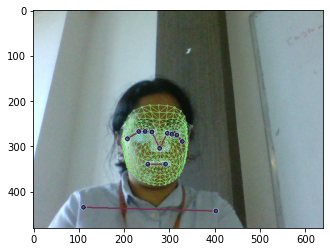

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks else np.zeros(1404)

SyntaxError: invalid syntax (1104686484.py, line 2)

In [14]:
face_landmark

NameError: name 'face_landmark' is not defined

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.43655744,  0.63370323, -1.28319037, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')


array([ 0.43655744,  0.63370323, -1.28319037, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing then Preprocess Data and Create Labels and Features

In [37]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(90, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(5, 3)

# Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
res = [.7, 0.2, 0.1]

In [38]:
actions[np.argmax(res)]

'hello'

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 90ms/step - loss: 1.1156 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.1096 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.6444 - categorical_accuracy: 0.5765
Epoch 4/2000
3/3 [==============================] - 0s 87ms/step - loss: 13.2739 - categorical_accuracy: 0.2588
Epoch 5/2000
3/3 [==============================] - 0s 90ms/step - loss: 6.1550 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.7298 - categorical_accuracy: 0.6588
Epoch 7/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.3842 - categorical_accuracy: 0.3294
Epoch 8/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.9561 - categorical_accuracy: 0.2941
Epoch 9/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.6379 - categorical_accuracy: 0.5059


3/3 [==============================] - 0s 85ms/step - loss: 0.1738 - categorical_accuracy: 0.9529
Epoch 147/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1657 - categorical_accuracy: 0.9529
Epoch 148/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.2037 - categorical_accuracy: 0.9412
Epoch 149/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1212 - categorical_accuracy: 0.9647
Epoch 150/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0887 - categorical_accuracy: 0.9765
Epoch 151/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0844 - categorical_accuracy: 0.9765
Epoch 152/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0836 - categorical_accuracy: 0.9882
Epoch 153/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1320 - categorical_accuracy: 0.9647
Epoch 154/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.3014 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 87ms/step - loss: 0.3550 - categorical_accuracy: 0.8941
Epoch 291/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1693 - categorical_accuracy: 0.9529
Epoch 292/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1711 - categorical_accuracy: 0.9176
Epoch 293/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1913 - categorical_accuracy: 0.9059
Epoch 294/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2425 - categorical_accuracy: 0.9294
Epoch 295/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1884 - categorical_accuracy: 0.9294
Epoch 296/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.2645 - categorical_accuracy: 0.9059
Epoch 297/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2284 - categorical_accuracy: 0.9294
Epoch 298/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.1847 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 87ms/step - loss: 0.1419 - categorical_accuracy: 0.9647
Epoch 435/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1539 - categorical_accuracy: 0.9294
Epoch 436/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1662 - categorical_accuracy: 0.9294
Epoch 437/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.2119 - categorical_accuracy: 0.9294
Epoch 438/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1498 - categorical_accuracy: 0.9412
Epoch 439/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1529 - categorical_accuracy: 0.9176
Epoch 440/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.1179 - categorical_accuracy: 0.9412
Epoch 441/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1672 - categorical_accuracy: 0.9529
Epoch 442/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1100 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 97ms/step - loss: 1.4279 - categorical_accuracy: 0.8353
Epoch 579/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.4723 - categorical_accuracy: 0.4000
Epoch 580/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.2020 - categorical_accuracy: 0.3647
Epoch 581/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0034 - categorical_accuracy: 0.5412
Epoch 582/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.7647 - categorical_accuracy: 0.6471
Epoch 583/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.6523 - categorical_accuracy: 0.7882
Epoch 584/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.6116 - categorical_accuracy: 0.7176
Epoch 585/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.5266 - categorical_accuracy: 0.8235
Epoch 586/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4198 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 93ms/step - loss: 7.3020e-05 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.1956e-05 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 94ms/step - loss: 7.0696e-05 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 89ms/step - loss: 6.9620e-05 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 85ms/step - loss: 6.8606e-05 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.8257e-05 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 93ms/step - loss: 6.7251e-05 - categorical_accuracy: 1.0000
Epoch 727/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.5883e-05 - categorical_accuracy: 1.0000
Epoch 728/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.51

3/3 [==============================] - 0s 88ms/step - loss: 3.2828e-05 - categorical_accuracy: 1.0000
Epoch 791/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.2569e-05 - categorical_accuracy: 1.0000
Epoch 792/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.2147e-05 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.1870e-05 - categorical_accuracy: 1.0000
Epoch 794/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.1626e-05 - categorical_accuracy: 1.0000
Epoch 795/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.1330e-05 - categorical_accuracy: 1.0000
Epoch 796/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.1063e-05 - categorical_accuracy: 1.0000
Epoch 797/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.0683e-05 - categorical_accuracy: 1.0000
Epoch 798/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.04

3/3 [==============================] - 0s 95ms/step - loss: 1.8709e-05 - categorical_accuracy: 1.0000
Epoch 861/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.8616e-05 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.8475e-05 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.8397e-05 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.8252e-05 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.8144e-05 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.8022e-05 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.7912e-05 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.

Epoch 930/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.2352e-05 - categorical_accuracy: 1.0000
Epoch 931/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.2268e-05 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.2213e-05 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.2152e-05 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.2091e-05 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2023e-05 - categorical_accuracy: 1.0000
Epoch 936/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.1982e-05 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.1904e-05 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 10

3/3 [==============================] - 0s 89ms/step - loss: 6.6727e-06 - categorical_accuracy: 1.0000
Epoch 1069/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.6405e-06 - categorical_accuracy: 1.0000
Epoch 1070/2000
3/3 [==============================] - 0s 91ms/step - loss: 6.6209e-06 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.5942e-06 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 102ms/step - loss: 6.5732e-06 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.5465e-06 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.5269e-06 - categorical_accuracy: 1.0000
Epoch 1075/2000
3/3 [==============================] - 0s 87ms/step - loss: 6.5002e-06 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 [==============================] - 0s 87ms/step - l

3/3 [==============================] - 0s 105ms/step - loss: 4.1933e-06 - categorical_accuracy: 1.0000
Epoch 1207/2000
3/3 [==============================] - 0s 104ms/step - loss: 4.1779e-06 - categorical_accuracy: 1.0000
Epoch 1208/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.1667e-06 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 111ms/step - loss: 4.1540e-06 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.1442e-06 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 106ms/step - loss: 4.1330e-06 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.1176e-06 - categorical_accuracy: 1.0000
Epoch 1213/2000
3/3 [==============================] - 0s 99ms/step - loss: 4.1063e-06 - categorical_accuracy: 1.0000
Epoch 1214/2000
3/3 [==============================] - 0s 101ms/s

3/3 [==============================] - 0s 90ms/step - loss: 3.4318e-06 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.4248e-06 - categorical_accuracy: 1.0000
Epoch 1277/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.4178e-06 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.4023e-06 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.3967e-06 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.3855e-06 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.3799e-06 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.3687e-06 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 101ms/step - 

3/3 [==============================] - 0s 96ms/step - loss: 2.4108e-06 - categorical_accuracy: 1.0000
Epoch 1414/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.4080e-06 - categorical_accuracy: 1.0000
Epoch 1415/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.4066e-06 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.3996e-06 - categorical_accuracy: 1.0000
Epoch 1417/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.3926e-06 - categorical_accuracy: 1.0000
Epoch 1418/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.3870e-06 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.3800e-06 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.3729e-06 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 92ms/step - l

3/3 [==============================] - 0s 89ms/step - loss: 1.7727e-06 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.7657e-06 - categorical_accuracy: 1.0000
Epoch 1553/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.7615e-06 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.7587e-06 - categorical_accuracy: 1.0000
Epoch 1555/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.7559e-06 - categorical_accuracy: 1.0000
Epoch 1556/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.7517e-06 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.7475e-06 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.7418e-06 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 93ms/step - lo

3/3 [==============================] - 0s 97ms/step - loss: 1.3351e-06 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.3337e-06 - categorical_accuracy: 1.0000
Epoch 1691/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.3309e-06 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.3295e-06 - categorical_accuracy: 1.0000
Epoch 1693/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.3281e-06 - categorical_accuracy: 1.0000
Epoch 1694/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.3239e-06 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.3169e-06 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.3169e-06 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 96ms/step - lo

3/3 [==============================] - 0s 88ms/step - loss: 1.0294e-06 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0294e-06 - categorical_accuracy: 1.0000
Epoch 1829/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0294e-06 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0266e-06 - categorical_accuracy: 1.0000
Epoch 1831/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0238e-06 - categorical_accuracy: 1.0000
Epoch 1832/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0182e-06 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0154e-06 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0154e-06 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 89ms/step - lo

3/3 [==============================] - 0s 91ms/step - loss: 7.9239e-07 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 95ms/step - loss: 7.9239e-07 - categorical_accuracy: 1.0000
Epoch 1967/2000
3/3 [==============================] - 0s 101ms/step - loss: 7.9239e-07 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 116ms/step - loss: 7.8958e-07 - categorical_accuracy: 1.0000
Epoch 1969/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.8958e-07 - categorical_accuracy: 1.0000
Epoch 1970/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.8678e-07 - categorical_accuracy: 1.0000
Epoch 1971/2000
3/3 [==============================] - 0s 99ms/step - loss: 7.8538e-07 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 101ms/step - loss: 7.8397e-07 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 95ms/step -

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [55]:
res = model.predict(X_test)

1/1 [==============================] - 1s 657ms/step


In [56]:
actions[np.argmax(res[4])]

'thanks'

In [57]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [53]:
model.save('action.h5')

In [61]:
del model

In [36]:
model.load_weights('action.h8')

In [38]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [39]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 720ms/step


In [40]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [3, 0]],

       [[0, 3],
        [0, 2]]], dtype=int64)

In [42]:
accuracy_score(ytrue, yhat)

0.4

In [71]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

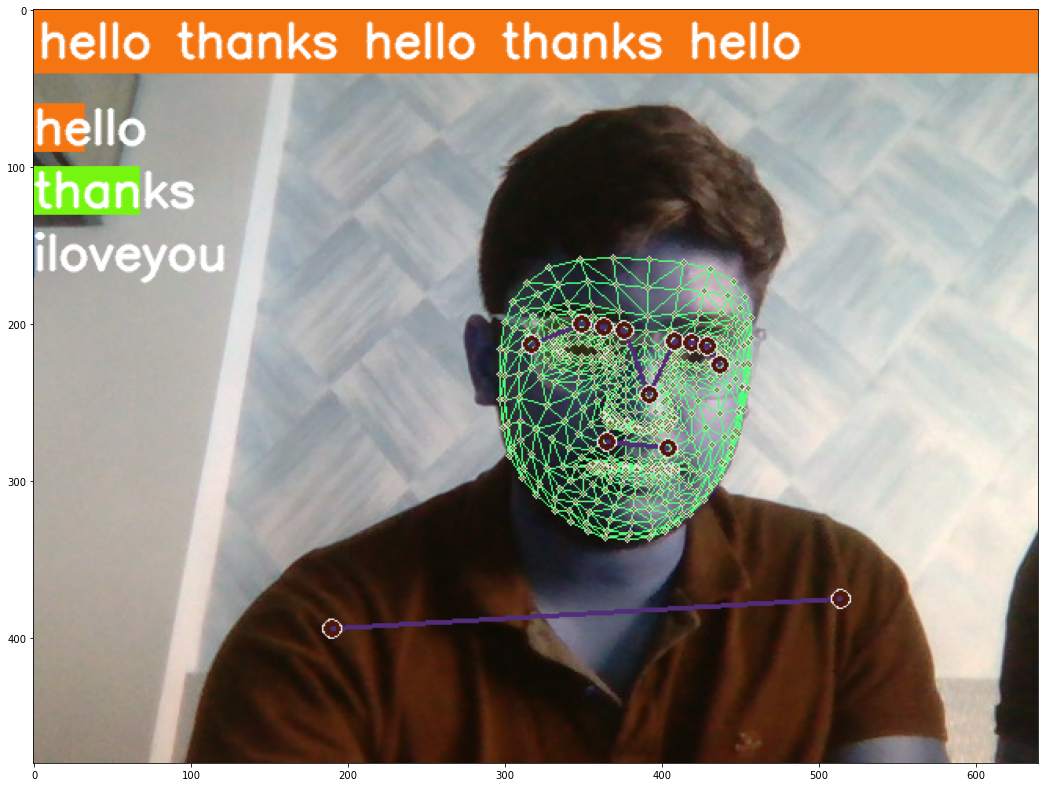

In [77]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [78]:
sequence.reverse()

In [79]:
len(sequence)

30

In [80]:
sequence.append('def')

In [81]:
sequence.reverse()

In [82]:
sequence[-30:]

[array([ 0.53579575,  0.51017976, -0.8665784 , ...,  0.01411716,
         0.39881444, -0.06564225]),
 array([ 0.53932464,  0.50044692, -0.80215394, ...,  0.01912918,
         0.41487521, -0.06853848]),
 array([ 0.54521167,  0.49280342, -0.92243701, ...,  0.09432524,
         0.40313488, -0.05057184]),
 array([ 0.5449869 ,  0.48842537, -0.83560973, ...,  0.18224087,
         0.42446244, -0.03113327]),
 array([ 0.5467549 ,  0.48549351, -0.82812798, ...,  0.22927114,
         0.43025249, -0.03556988]),
 array([ 0.54835027,  0.48526776, -1.01701093, ...,  0.11937112,
         0.40644181, -0.08085665]),
 array([ 0.54761034,  0.4854863 , -1.00790012, ...,  0.0569848 ,
         0.41502285, -0.10961011]),
 array([ 0.54700869,  0.48564678, -1.00324333, ...,  0.04685949,
         0.46029526, -0.08660015]),
 array([ 0.55071372,  0.48572308, -1.34791791, ...,  0.1091544 ,
         0.51242614, -0.12059939]),
 array([ 0.546323  ,  0.49073651, -1.1162703 , ...,  0.46359152,
         0.60664093, -0.08

In [43]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'prob_viz' is not defined

In [83]:
res[np.argmax(res)] > threshold

False

In [84]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [85]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 33ms/step


array([[9.9996567e-01, 3.4345867e-05, 2.6286270e-14]], dtype=float32)